### 01 - Problem (case study)

Data provided shows demographics and buying behaviors of the insurance packages. The goal of the case study is to predict how well demographic factors and buying behaviors factors can predict the total claim amount.

### 02 - Getting Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
mca_data = pd.read_csv('../lab-customer-analysis-final-round/files_for_lab/csv_files/marketing_customer_analysis.csv')
mca_data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 03 - Cleaning/Wrangling/EDA

In [4]:
# standartiting headers and dealing with nan:
def data_transformation(mca_data):
    mca_data.columns = mca_data.columns.str.lower().str.replace(' ', '_')
    
    numeric_cols = mca_data.select_dtypes(include=np.number).columns
    mca_data[numeric_cols] = mca_data[numeric_cols].fillna(mca_data[numeric_cols].mean())
    
    categorical_cols = mca_data.select_dtypes(include='object').columns
    mca_data[categorical_cols] = mca_data[categorical_cols].fillna(mca_data[categorical_cols].mode().iloc[0])
    
    return mca_data

In [43]:
mca_data = data_transformation(mca_data)
round(mca_data.isna().sum()/len(mca_data),4)*100

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [6]:
mca_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

### 04 - Processing Data

In [ ]:
# Here I will not remove the outliers from the numerical columns, as I did in the previous lab, because it did not 
# result in improving the model

In [7]:
numerical_columns = mca_data.select_dtypes(include = np.number)
categorical_columns = mca_data.select_dtypes(include = "object").drop(["customer"], axis=1) #dropping customer id

In [8]:
numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [9]:
categorical_columns.describe().T

,count,unique,top,freq
state,9134,5,California,3150
response,9134,2,No,7826
coverage,9134,3,Basic,5568
education,9134,5,Bachelor,2748
effective_to_date,9134,59,1/10/11,195
employmentstatus,9134,5,Employed,5698
gender,9134,2,F,4658
location_code,9134,3,Suburban,5779
marital_status,9134,3,Married,5298
policy_type,9134,3,Personal Auto,6788


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

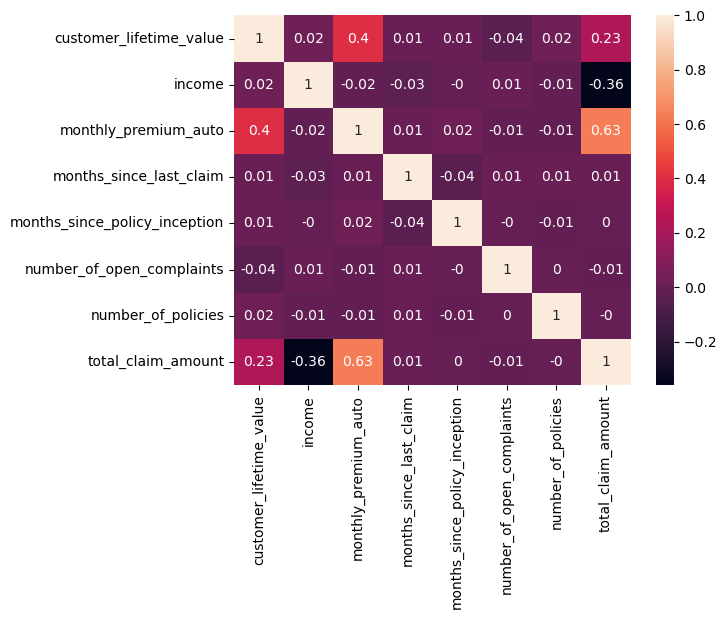

In [12]:
# Checking for multicollinearity that is not detected. So all num.columns will be used in the model.
correlations_matrix = round(numerical_columns.corr(),2)
sns.heatmap(correlations_matrix, annot=True) #annot=True displays the correlation values
plt.show()

In [16]:
# X-y split
y = numerical_columns["total_claim_amount"]
X = numerical_columns.drop(["total_claim_amount"], axis = 1)

In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#Applying a scaler onto numerical X-variables
transformer = MinMaxScaler().fit(X)
X_normalized = transformer.transform(X)
X_norm = pd.DataFrame(X_normalized)
print(X_normalized.shape)
pd.DataFrame(X_normalized, columns=x.columns).describe()

(9134, 7)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.074999,0.376645,0.135946,0.431343,0.485501,0.076878,0.245771
std,0.084382,0.303857,0.145181,0.287807,0.281879,0.182077,0.298773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025744,0.000000,0.029536,0.171429,0.242424,0.000000,0.000000
50%,0.047677,0.338959,0.092827,0.400000,0.484848,0.000000,0.125000
75%,0.086754,0.623318,0.202532,0.657143,0.717172,0.000000,0.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
from sklearn.preprocessing import OneHotEncoder

#Applying OneHotEncoder onto categorical variables

encoder = OneHotEncoder(drop='first')
encoder = OneHotEncoder().fit(categorical_columns)
print(encoder.categories_)

encoded = encoder.transform(categorical_columns).toarray()
print(encoded)
onehot_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
onehot_encoded.head(20)

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['1/1/11', '1/10/11', '1/11/11', '1/12/11', '1/13/11', '1/14/11',
       '1/15/11', '1/16/11', '1/17/11', '1/18/11', '1/19/11', '1/2/11',
       '1/20/11', '1/21/11', '1/22/11', '1/23/11', '1/24/11', '1/25/11',
       '1/26/11', '1/27/11', '1/28/11', '1/29/11', '1/3/11', '1/30/11',
       '1/31/11', '1/4/11', '1/5/11', '1/6/11', '1/7/11', '1/8/11',
       '1/9/11', '2/1/11', '2/10/11', '2/11/11', '2/12/11', '2/13/11',
       '2/14/11', '2/15/11', '2/16/11', '2/17/11', '2/18/11', '2/19/11',
       '2/2/11', '2/20/11', '2/21/11', '2/22/11', '2/23/11', '2/24/11',
       '2/25/11', '2/26/11', '2/27/11', '2/28/11', '2/3/11', '2/4/11',
       '2/5/11', '2/6/11', '2/7/11', '2/8/11', '2/9/11'], dtype=object), array([

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# Concatenation categorical and numerical together
X1 = pd.concat([onehot_encoded, pd.DataFrame(X_normalized, columns=x.columns)], axis =1)

In [27]:
# Splitting into train set and test set
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=35)

In [28]:
print(X1_train.shape)
print(X1_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 123)
(1827, 123)
(7307,)
(1827,)


### 05 - Modeling

In [30]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()
lm.fit(X1_train,y_train)

LinearRegression()

In [37]:
y_pred = lm.predict(X1_test)

In [38]:
from sklearn.metrics import r2_score
y_pred_train = lm.predict(X1_train)
print("R2 of a train set:", r2_score(y_train, y_pred_train))
y_pred_test = lm.predict(X1_test)
print("R2 of a test set:", r2_score(y_test, y_pred_test))

R2 of a train set: 0.7707229957287909
R2 of a test set: 0.7795984655319099


### 06 - Model Validation

In [39]:
from sklearn.metrics import mean_absolute_error

In [40]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

94.79362220197045


In [41]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

18187.750253313716


In [42]:
rmse = np.sqrt(mse)
print(rmse)

134.86196740858304


### 07 - Reporting

After running the linean model, we can r2 tell us that the model can explain correctly around 77% of the training set and almost 78% of the test set. It is not so bad, but it still leaves quite many unexplained cases. The further optimizations could be excluding some of the columns from the model, or working with outliers in a different way.
The other errors is difficult to interpret because they have to be compared with the errors from alternative models.